<a href="https://colab.research.google.com/github/mberko128/World-Happiness.github.io/blob/main/Copy_of_Final_Project_Berkowitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of the factors that contribute to World Happiness
Michael Berkowitz, Julian Trebach, Jack Eselius, Jacob Buchanon

In [41]:
#clone the github repository
Use_Google_Drive= False #@param {type:"boolean"}

if Use_Google_Drive:
    import os
    from google.colab import drive 

    drive.mount('/content/gdrive',force_remount=True)

    Working_Directory = 'My Drive' #@param {type:"string"}
    wd="/content/gdrive/"+Working_Directory
    os.chdir(wd)

    !git clone https://github.com/mberko128/World-Happiness.github.io
    
    %cd pard187.github.io/
    dirpath = os.getcwd()
    print("current directory is : " + dirpath)

    
else:
    !git clone https://github.com/mberko128/World-Happiness.github.io
    %cd pard187.github.io/

fatal: destination path 'World-Happiness.github.io' already exists and is not an empty directory.
[Errno 2] No such file or directory: 'pard187.github.io/'
/content


In [42]:
#import libraries
import numpy as mp
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
from sklearn.preprocessing import StandardScaler

# Part I. Buisness Understanding

The COVID-19 pandemic has brought to light just how important happiness and mental health is in our lives. During times of lockdown, many individuals found themselves struggling with mental health issues and craving the things and activities that bring us most joy. In other words, the pandemic highlighted just how important being happy is for our mental health and forced us to reflect on the specific elements of our lives that bring us happiness.

Everyone wants to live the happiest life they can. For some, social support may be the most important aspect of being happy. For others, happiness may stem from economic success, helping others, or having the freedom and opportunity to do what they wish. Through the data science process, our group will try and decipher what elements foster happiness on a global scale. In other words, we will try to answer the following question: **What are the most influential factors in one’s life to being happy?**

Our analysis has the potential to provide valuable and actionable insights for policymakers and law-makers, whose ultimate goal is to create and implement policies that will best benefit society. In the unprecedented times we have been living in with the pandemic, being happy and having good mental health has never been so important. Our analysis can hopefully shed some light as to whether social networks, financial success, or some other factor may impact happiness the most, which policymakers can use to inspire practices that are most likely to foster happiness among society at large.


# Part II. Data Understanding

In order to gain insight into what factors most influence one’s happiness, we will use a dataset provided by the United Nations entitled World Happiness. The UN reports world happiness data on a yearly basis. This is the most recent dataset on the subject. 

##World Happiness Dataset

The UN uses data collected from the Gallup World Poll, which surveys individuals on main life evaluation questions. The Gallup World Poll  is conducted yearly in at least 153 countries with a random sample of at least 1000 respondents in each country. Participants of the survey were asked how a number of different factors, such as social support and freedom to make life choices, impacted the overall happiness in their lives from 0 to 10, with 10 being the best possible life and 0 being the worst. They are also asked to rate their overall happiness level in their lives, on this same 0 to 10 scale. Other varriables in the dataset were binary survey questions, so respondents answered with either a 0 or 1. The values for these variables are averaged for each country and year. The data collected is based entirely on the survey scores, using the Gallup weights to make the estimates representative. 

There are a total of 11 columns in our dataset: Country name, year, life ladder, Log GDP per capita, social support, healthy life expectancy at birth, freedom to make life choices, generosity, perceptions of corruption, positive affect, and negative affect. The dataset includes data from 153 countries from the years 2006 to 2020. Note that not every country has data from each year from this time frame. The column titles and description are listed below.


Attribute | Data Type | Description |
--- | --- | --- 
Country Name | Nominal | Name of the country
Year | Interval | Describes the year in which data represents
Life Ladder | Ratio | Describes respondents overall life happiness on a scale of 0-10
Log GDP Per Capita | Ratio | Describes the natural log of country's GDP
Social Support | Ratio | Describes the national average of the binary responses (either 0 or 1) to the question <br> “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
Healthy Life Expextancy at Birth | Ratio | The time series of healthy life expectancy at birth constructed based on data from the World Health Organization (WHO) <br> Global Health Observatory data repository, with data available for 2005, 2010, 2015, and 2016. 
Freedom to Make Life Choices | Ratio | National average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose <br> what you do with your life?”
Generosity | Ratio | Describes the residual of regressing the national average of GWP responses to the question “Have you donated money to a <br> charity in the past month?” on GDP per capita.
Perceptions of Corruption | Ratio | Describes the average of binary answers to two GWP questions: “Is corruption widespread throughout the government or not?” <br> and “Is corruption widespread within businesses or not?” Where data for government corruption are missing, the perception of <br> business corruption is used as the overall corruption-perception measure.
Positive affect | Ratio | Desrcibes the average of previous-day affect measures for happiness, laughter, and enjoyment for years 2008 to 2012, and some in 2013
Negative affect | Ratio | Decribes the average of previous-day affect measures for worry, sadness, and anger for all years.



# Part III. Data Preparation

## Access the Dataset

The first step in preparing our data is loading in our dataset.

In [43]:
#read dataset as csv from github repository
url = "https://github.com/mberko128/World-Happiness.github.io/raw/main/world-happiness-report.csv"
happiness_data = pd.read_csv(url)
happiness_data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


##Subsetting Data



###Dropping Columns

The first step in subsetting our data was removing any unwanted columns. Our analysis is intended to identify what factors contribute the most to happiness, however, we aren't as concerned with how this varies between countries or years. For this reason, we will start by deleting columns 'Country Name' and 'Year'. 

In [44]:
#Dropping columns 'Country Name' and 'Year'
happiness_data = happiness_data.drop(['Country name', 'year'], axis=1)


Next, we decided to drop the column 'Log GDP per capita'. The reason we chose to drop this column is because it too reflects differences between countries, and our focus is on what makes humans happy unrelated to where they may live. To this end, the variablity among countries may be too large that we wouldn't be able to use it to gain accurate insight into our analysis.

In [45]:
#Dropping column 'Log GDP per capita'
happiness_data = happiness_data.drop(['Log GDP per capita'], axis=1)

Let's take a look at our updated data frame:

In [46]:
#Updated Data
happiness_data.head()

,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,3.724,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,4.402,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,4.758,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,3.832,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,3.783,0.521,52.24,0.531,0.236,0.776,0.710,0.268


###Checking for Null Values

The next step in preparing our data was to check for any null values. The purpose of this is segment is twofold. Firstly, we will identify if any variables require removal from the data set from an extreme number of null values. Secondly, we will remove any remaining null values that may remain among our updated data frame. 

We will start by creating a table to indentify which, if any, columns contain an extreme number of null values.



In [47]:
#Creating table of column names and respective null values
print(happiness_data.isnull().sum())

Life Ladder                           0
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64


The columns with the highest number of null values are 'Generosity' and 'Perceptions of corruption', with 89 and 110 null values, respectively. Relative to the size of our data, we do not see this as a large enough number to warrant removal of the column. 

Although there aren't enough null values to delete any columns, we still want to remove any null values from the data frame. Let's do that now.

In [48]:
#Deleting all null values
happiness_data = happiness_data.dropna()

#Ensuring all null values have been deleted


##Overview

Let's review what steps we took to prepare our data for analysis. 

We started by removing columns 'Country name' and 'year'. These columns weren't necessary relevent to our analysis, since we aren't necessarily concerned with how the factors of happiness have changed over time nor how they vary between country. For similar reasoning, we also removed column 'Log GDP per capita'.

Then, we checked to make sure none of our remaining columns had an excessive number of null values. After ensuring the remaining columns were appropriate for our analysis, we removed all remaining null values. 

The final column names and the first five rows of the final data frame can be seen below.



In [49]:
#Summary of prepared data frame
happiness_data.head()

,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,3.724,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,4.402,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,4.758,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,3.832,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,3.783,0.521,52.24,0.531,0.236,0.776,0.710,0.268


# Part IV. Modeling and Evaluating

## EDA


###Range, median, and mean

The first step in our EDA is to view the distributions and some summary statistics for each of the columns in our data frame. 

In [50]:
#Viewing Distributions
import numpy as np

happiness_data.agg({'Life Ladder':[np.mean, np.median, np.max, np.min],
                  'Social support':[np.mean, np.median, np.max, np.min],
                  'Healthy life expectancy at birth':[np.mean, np.median, np.max, np.min],
                  'Freedom to make life choices':[np.mean, np.median, np.max, np.min],
                  'Generosity':[np.mean, np.median, np.max, np.min],
                  'Perceptions of corruption':[np.mean, np.median, np.max, np.min],
                  'Positive affect':[np.mean, np.median, np.max, np.min],
                  'Negative affect':[np.mean, np.median, np.max, np.min],})

,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
mean,5.44668,0.810321,63.225465,0.739442,-0.000638,0.750996,0.70955,0.269446
median,5.36400,0.835000,65.100000,0.757500,-0.025500,0.806000,0.72200,0.259000
amax,7.97100,0.987000,77.100000,0.985000,0.689000,0.983000,0.94400,0.705000
amin,2.37500,0.290000,32.300000,0.258000,-0.335000,0.035000,0.32200,0.094000


Interestingly, the mean life ladder score is 5.44668, which upon intial reaction is lower than expected. It's also interesting to note that the mean of 'Generosity' was a negative value, meaning donating to charity likely did not have a meaningful impact on happiness. We can take a more in depth look at the distribution of these variables by creating boxplots. 

###Boxplots

The first step in our EDA was to learn more about each of the variables in our dataset. To do this, we created boxplots of each variable. 

Our first boxplot contains the variable 'Life Ladder'. As mentioned in the description table of our variables, 'Life Ladder' is a numeric value on a scale of 0-10 describing survey respondents overall life happiness. 


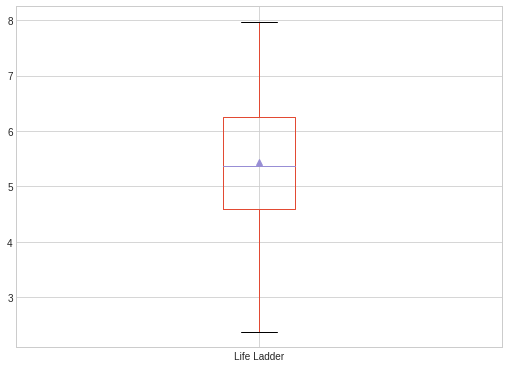

In [51]:
#Boxplot of 'Life Ladder'
fig, ax = plt.subplots(figsize=(8.7,6.27))
mean_shape = dict(markerfacecolor='green', markeredgecolor='green')
happiness_data['Life Ladder'].plot(kind='box', showmeans=True);

Life ladder interquatrile values range from roughly 2.5 to 8. The median and mean of values is just below 5.5. We should also note that there doesn't appear to be extreme outliers. 

Next we will look at 'Social support'

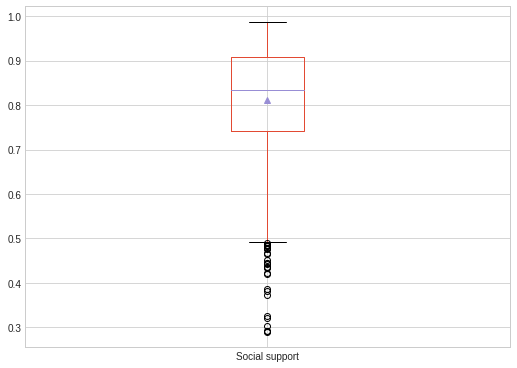

In [52]:
#Boxplot of 'Social support'
fig, ax = plt.subplots(figsize=(8.7,6.27))
mean_shape = dict(markerfacecolor='green', markeredgecolor='green')
happiness_data['Social support'].plot(kind='box', showmeans=True);

The 'Social support' variable is a binary survey answer (either 0 or 1). As reflected by a mean and median value of above 0.8, we note that the majority of survey respondents said they do in fact of someone in their life to count on when they need them. This is not too much of a surprise, and we expect this variable to be quite meaningful to our later prediction of overall happiness.

Next, let's look at a boxplot of the 'Healthy life expectancy at birth' variable.

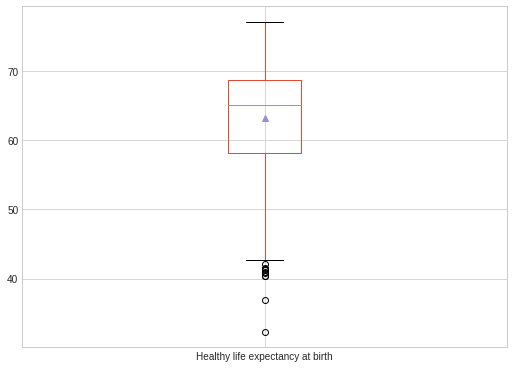

In [53]:
#Boxplot of 'Healthy life expectancy at birth'
fig, ax = plt.subplots(figsize=(8.7,6.27))
mean_shape = dict(markerfacecolor='green', markeredgecolor='green')
happiness_data['Healthy life expectancy at birth'].plot(kind='box', showmeans=True);

As seen above, interquartile values in this variable range from roughly 41 to 77. The median and mean are both roughly 65, with the median being just larger than the mean.

Next, let's look at a boxplot of 'Freedom to make life choices'

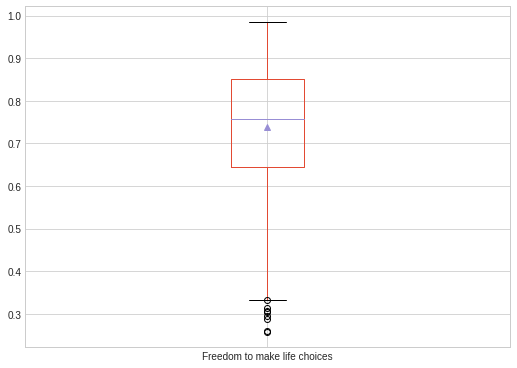

In [54]:
#Boxplot of 'Freedom to make life choices'
fig, ax = plt.subplots(figsize=(8.7,6.27))
mean_shape = dict(markerfacecolor='green', markeredgecolor='green')
happiness_data['Freedom to make life choices'].plot(kind='box', showmeans=True);

This variable was another binary survey response, so values range from 0 to 1. The interquartile range for this variable is roughly .33 to .99. The mean is roughly .73 with the median being slightly higher. This is the distribution we had hoped for, in that it reflects the majority of people answered that they are satisified with their freedom to make life choices. We also expect this variable to be meaningful in predicting overal happiness levels. 

Next, we will look at the distribution of 'Generosity' 

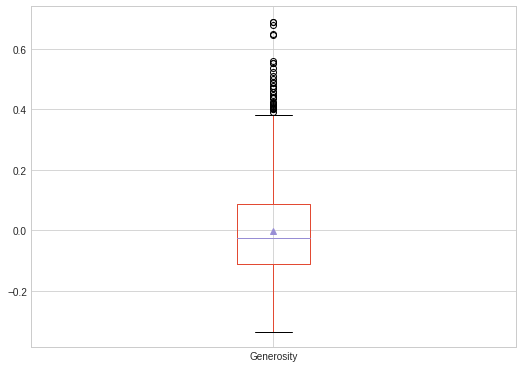

In [55]:
#Boxplot of 'Generosity'
fig, ax = plt.subplots(figsize=(8.7,6.27))
mean_shape = dict(markerfacecolor='green', markeredgecolor='green')
happiness_data['Generosity'].plot(kind='box', showmeans=True);

Interestingly, the mean value of the 'Generosity' variable is right at 0. This reflects the idea that donating to charity had no real effect on happiness levels. This is useful to note before we create our model to predict happiness levels. We will most likely not include this variable in our model. 

Next, we will look at the distribution of 'Perceptions of corruption' variable

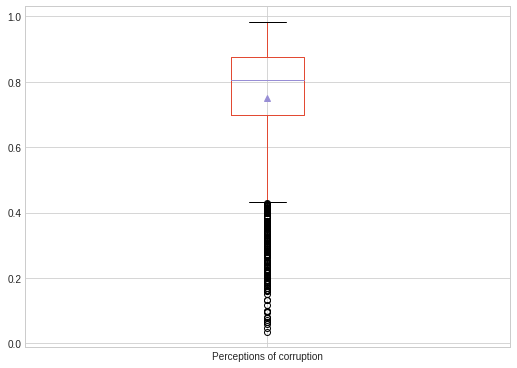

In [56]:
#Boxplot of 'Perceptions of corruption'
fig, ax = plt.subplots(figsize=(8.7,6.27))
mean_shape = dict(markerfacecolor='green', markeredgecolor='green')
happiness_data['Perceptions of corruption'].plot(kind='box', showmeans=True);

This variable also contains binary survey responses (0 or 1). As seen above, this variable appears to contain the most outliers among all our variables. We will certainly keep that in the back of our minds when the time comes to design our machine learning model. The median value for this variable is roughly .8, with a slightly lower mean. 

The next distribution we will take a look at is 'Positive affect'

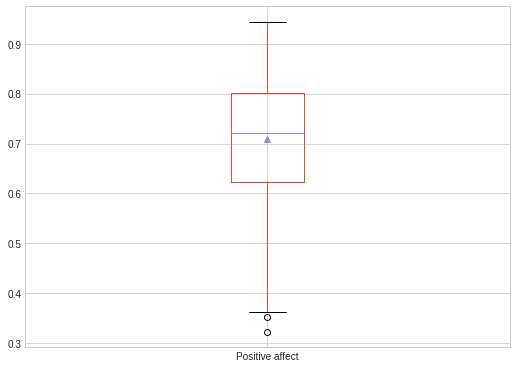

In [57]:
#Boxplot of 'Positive affect'
fig, ax = plt.subplots(figsize=(8.7,6.27))
mean_shape = dict(markerfacecolor='green', markeredgecolor='green')
happiness_data['Positive affect'].plot(kind='box', showmeans=True);

Positive affect is another variable in our data set where survey participants responded with either a 0 or 1. The meean and median are both around .72 and the interquartile range stretches from roughly .36 to .97. With mean and median being well above .5, it's safe to say this variable most likely is a strong contributor to happiness levels.

The last variable in our dataset we will make a boxplot for is 'Negative affect'

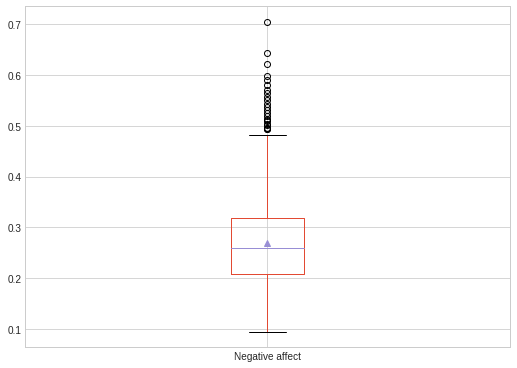

In [58]:
#Boxplot of 'Negative affect'
fig, ax = plt.subplots(figsize=(8.7,6.27))
mean_shape = dict(markerfacecolor='green', markeredgecolor='green')
happiness_data['Negative affect'].plot(kind='box', showmeans=True);

Negative affect, like positive affect, also had survey respondents answer with a 0 or 1. Unlike positive affect, the mean and median of negative affect are below .5. More specifically, the median and mode are roughly .27. From this, we can conclude that negative affect probably won't impact happiness levels as much as positive affect. 



###Correlation

To gain a better sense of what variables in our data set may be correlated to each other, and specifically to life ladder, we constructed a correlation heatmap.

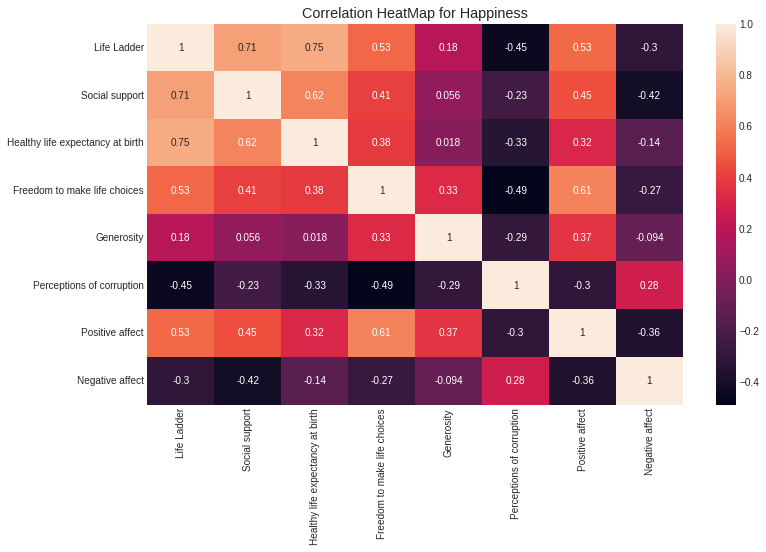

In [59]:
#get correlations of each features in dataset
corrmat = happiness_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,7))
#plot heat map
g=sns.heatmap(happiness_data[top_corr_features].corr(),annot=True).set_title('Correlation HeatMap for Happiness');


The correlation heatmap from above provides information about the relationships between all the variables we have been looking at thus far. Our main focus is the correlation between Life Ladder, overall happiness on a sale of 0-10, and the other independent variables. THe most interesting/strongly correlated relationships are as follows:

The most rongly correlated variable with Life Ladder is healthy life expectancy at birth (0.75). 

The second most correlated variable is social support (0.71). 

Freedom to make choices (0.53) and positive affect (0.53) are also both well correlated with life happiness. 

Lastly, perceptions of corruption throughout one's government is negatively correlate with a person's happiness (-0.45).

###Scatterplots

The next step in our EDA was making scatterplots. Specifically, we wanted to take a look at the variables that were identified above to have high correlations to 'Life ladder'. We constructed scatterplots of the relationship between the following variables:

- 'Life Ladder' and 'Social Support'
- 'Life Ladder' and 'Healthy Life Expectancy at birth'
- 'Life Ladder' and 'Freedom to make life choices'
- 'Life Ladder' and 'Positive Affect'
- 'Life Ladder' and 'Perceptions of Corruption'

The first scatterplot we will look at is between 'Life Ladder' and 'Social Support'


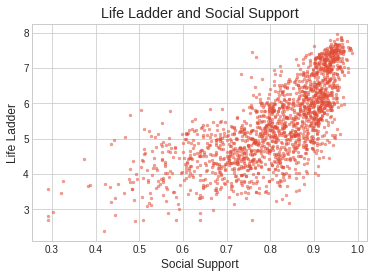

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
plt.style.use('seaborn-whitegrid')
plt.scatter("Social support", "Life Ladder", data=happiness_data, s = 8, alpha = .5) 
plt.title('Life Ladder and Social Support')
plt.xlabel("Social Support")
plt.ylabel("Life Ladder")
plt.show()

This scatterplot shows a strong positive correlation between social support and life ladder. Meaning, having a strong social circle and people to rely on is very important for a person’s happiness. This makes sense for most normal situations, having family and friends who are there for you when you are in times of need are more likely to help you get through tough times compared to having nobody there for you. 


The next scatterplot illustrates the relationship between 'Life Ladder' and 'Healthy life expectancy at birth'


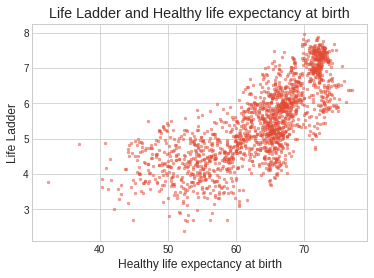

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
plt.style.use('seaborn-whitegrid')
plt.scatter("Healthy life expectancy at birth", "Life Ladder", data=happiness_data, s = 8, alpha = .5) 
plt.title('Life Ladder and Healthy life expectancy at birth')
plt.xlabel("Healthy life expectancy at birth")
plt.ylabel("Life Ladder")
plt.show()

This second scatterplot shows a very similar relationship as the last one. We can clearly see that healthy life expectancy at birth is strongly positively correlated with a person’s happiness. This is interesting because there are many more specific variables that impact life expectancy, that could be driving this relationship. Things like salary, mental health, hometown, and so on. Nonetheless, the better the life expectancy for a person, the more happy they are likely to be. 

The next scatterplot illustrates the relationship between 'Life Ladder' and 'Freedom to make life choices'


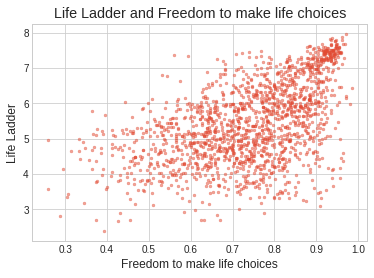

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
plt.style.use('seaborn-whitegrid')
plt.scatter("Freedom to make life choices", "Life Ladder", data=happiness_data, s = 8, alpha = .5) 
plt.title('Life Ladder and Freedom to make life choices')
plt.xlabel("Freedom to make life choices")
plt.ylabel("Life Ladder")
plt.show()

This scatterplot of freedom to make life choices and happiness show a positive correlation, although not as strong as some of the others. It means that when people are not told what to do and can make decisions for themselves, they are more likely to be happy. This makes sense, but is not as strongly related to the life happiness as some of the other variables because people could feel overwhelmed by having to make their ow decisions and would actually sometimes prefer to have things planned out/decided for them. For the most part, however, the freedom to make choices is associated with a higher life happiness rating.

The next scatterplot illustrates the relationship between 'Life Ladder' and 'Positive affect'


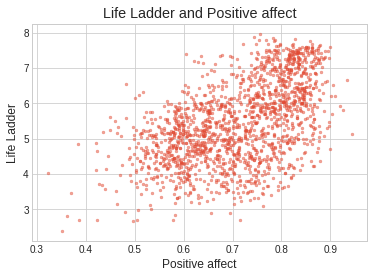

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
plt.style.use('seaborn-whitegrid')
plt.scatter("Positive affect", "Life Ladder", data=happiness_data, s = 8, alpha = .5) 
plt.title('Life Ladder and Positive affect')
plt.xlabel("Positive affect")
plt.ylabel("Life Ladder")
plt.show()

Life Ladder and Positive demonstrate a positive relationship. The relationship between these two variables isn't quite as linearly strong as some of the previous. The results of this plot don't quite come as a surprise. The positive affect variable describes whether survey respondents were happy the day prior to the survey. We expect happiness levels to mostly carry over from one day to the next, which is why we say this positive relationship between the 'Life Ladder' and 'Positive affect' variables.


The next scatterplot illustrates the relationship between 'Life Ladder' and 'Perceptions of corruption'


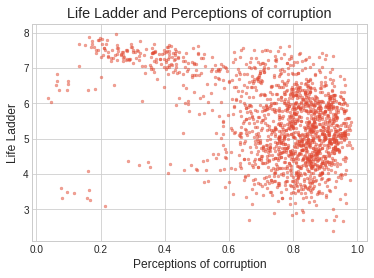

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
plt.style.use('seaborn-whitegrid')
plt.scatter("Perceptions of corruption", "Life Ladder", data=happiness_data, s = 8, alpha = .5) 
plt.title('Life Ladder and Perceptions of corruption')
plt.xlabel("Perceptions of corruption")
plt.ylabel("Life Ladder")
plt.show()

Perceptions of corruption appears to have a negative linear relationship with Life Ladder. What's most interesting to note from this plot is that the points on the low end of the x axis align with the highest values on the y axis. In other words, those who don't strongly believe their government is corrupt are likely to be very happy. 

**Summary**

Our EDA was influential in gaining a better understanding on the distributions, correlations, and relationships the variables had in our data set. We are most concerned with seeing which variables influenced 'Life Ladder'.

The mean and median values of 'Life Ladder' are just above five, which is perhaps slightly lower than we expected. In other words, the average respondent was neutral about their overall happiness level. In general, we would hope for higher scores among participants.

The strongest positive relationships among our variables and 'Life Ladder' appear to be 'Social Support', 'Healthy life expectancy at birth', and 'Positive affect'. This aligns with our expectations and reaffirms that having strong social support and healthy lifestyle are influential in fostering happiness. In the next section of our work, we will train a machine learning model to predict happiness levels using the variables in our data frame.

##Machine Learning Model




For our machine learning model, we decided to make a logisitic regression model. We chose this model type because we thought it would be the most effective in pursuing our goal to form actionable insights about happiness levels. 

### Checking Assumptions

*First*, let's review the assumptions associated with a logisitic regression model to ensure it would be appropriate for our analysis.


Assumptions:
1.   *The output is categorical.* <br>
    The target variable of our regression model is 'Life Ladder' which is a categorical datatype. To ensure of this, we will make it into a binary variable. Therefore in each case this assumption is satisfied.
2.  *Independence of observations.* <br>
    We can safely assume that this assumption is satisfied. The observations of this dataset vary by country and year, therefore they are independent of each other. 
3.  *Independence between features.* <br>
    With this assumption, we must confirm that there is no high collinearity between the predictors. We can conclude that this assumption is satisfied based on our previous examination of the correlation heatmap.
4.  *Linear Relationship between the logit of the outcome and each predictor variable* <br>
    We will safely assume that this assumption has been satisfied with our given dataset.
5.  *Large dataset* <br>
    We are pulling from a large set of observations and therefore this assumption is satisfied.



### Assigning Variables

The next step in constructing our model was determine the independent and dependent variables. Our project revovles around determining overall happiness, which is stored in the variable 'Life ladder'. This will be our dependent variable in the logisitic regression model. The other variables in our data frame make up the independent variables. 

Below is code to assign our dependent and independent variables. For the dependent variable, we split up 'Life Ladder' into a binary variable, that assigns a 1 for all happiness levels above 5 (neutral happiness), and a 0 for all values below or equal to 5. Essentially, we created a dummy variable that assigns a value of 1 to the levels of happiness that we deemed happy, and 0 to those we deemed unhappy.`



In [65]:
#Import libraries
import statistics
from sklearn.model_selection import train_test_split

#assigning predictor variable
happinessData = happiness_data
predictorGroups = happinessData.drop('Life Ladder', axis=1)
meanLifeLadder = statistics.mean(happinessData['Life Ladder'])
predictorGroups.head()

y = pd.Series(mp.where(happinessData["Life Ladder"].values > 5, 1, 0), 
          happinessData.index).values

Next, we split our data into the training and test sets.


In [66]:
predictorGroups_train, predictorGroups_test, y_train, y_test = train_test_split(predictorGroups, y, test_size=0.25, random_state=1000)

### Constructing and Evalauting Model

We are now ready to construct and run our base logisitic regression model.

In [67]:
#Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

#Construct model
cl = LogisticRegression(multi_class='multinomial', solver='lbfgs') #CHANGE FOR LOGISTIC
cl.fit(predictorGroups_train, y_train)
accur = cl.score(predictorGroups_test, y_test)

print("Logistic Regression Accuracy:", accur)

Logistic Regression Accuracy: 0.8688524590163934


This base model runs with an accuracy of roughly 87%. Next, we continued training the model to expose it to more data and see if it's preformance improves. Since our model already preforms with a high accuracy, we don't expect too much change.

In [68]:

from keras.models import Sequential
from keras import layers

inDim = predictorGroups_train.shape[1]  # Number of features


seq = Sequential()
seq.add(layers.Dense(10, input_dim=inDim, activation='relu'))
seq.add(layers.Dense(1, activation='sigmoid'))

seq.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
seq.summary()

history = seq.fit(predictorGroups_train, y_train, epochs=100, validation_data=(predictorGroups_test, y_test), batch_size=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                80        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
129/129 [==============================] - 1s 3ms/step - loss: 0.7540 - accuracy: 0.5738 - val_loss: 0.6378 - val_accuracy: 0.6276
Epoch 2/100
129/129 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.6175 - val_loss: 0.6303 - val_accuracy: 0.6276
Epoch 3/100
129/129 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.6175 - val_loss: 0.6244 - val_accuracy: 0.6276
Epoch 4/100
129/129 [====

As predicted, the accuracy our model did not change by too much. The accuracy of our model went from 87% to slightly lower at 80.8%. This doesn't come as a big surprise, since our intial model predicted with high accuracy to begin with.

Next, we will create a confusion matrix and a normalized confusion matrix to further evaluate the preformance of our model

Misclassified samples: 56
Accuracy: 0.87
Confusion matrix, without normalization
[[124  35]
 [ 21 247]]
Normalized confusion matrix
[[0.77987421 0.22012579]
 [0.07835821 0.92164179]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


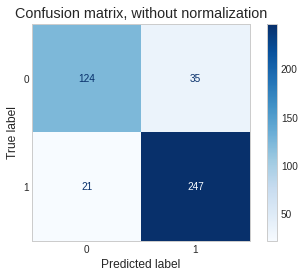

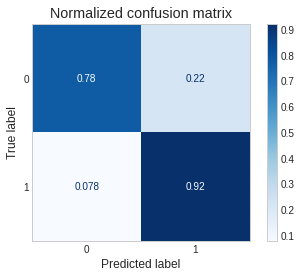

In [69]:
# use the model to make predictions with the test data
y_pred = cl.predict(predictorGroups_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

#plot a confusion matrix with the test set
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(cl, predictorGroups_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    plt.grid(False)
    print(title)
    print(disp.confusion_matrix)

plt.show()

Looking at the two confucian matrices of our Logistic Regression model, the second one being the same as the first but normalized, we can clearly see how are accuracy was very high at about 87%. This is because the model, according to the confusion matrix, correctly predicted 124 instances where people who were not happy as unhappy, which is a 78% accuracy for correcting predicting unappy people. Even better, the model accuractely predicted 247 instances of people who were happy as happy, meaning that the model had a 92% accuracy for correctly predicting happy people as happy. The accuracy percentages are from the normalized confucican matrix. Overall the model was slightly more accuracte at predicting happy people, but this could be due to the fact that their were more instances of happy people than unhappy, meaning more data to work from for predicting someone who is happy.

To complete the evaluation of our model's preformance, we printed the following two graphs which illustrate the training and validation accuracy and loss.

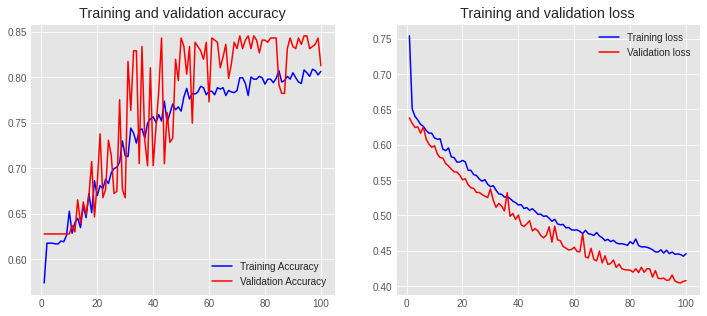

In [70]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)


In analyzing the model training and valdiation, accuracy and loss graphs, we can confirmn that our trained model is very accurate. The accuracy begins at around 60% and increases steadily to just over 80% where it begins to plateau. Both the training and validation lines follow a similar trend indicating a good fit (neither underfitting nor overfitting) for our model. 

We can confirm this in our training and validation loss graph at it shows signs of the loss value dropping quickly at the beginnign and usually smoothing into a plateau, indicatng a good, and in some cases, arguably too high learning rate. After running this notebook multiple times the model achieves a simialr accuracy rate each time, however the validation graph seems to dipict anywhere from a very steep and high learning curve (much like the shape of a rounded "L") to a more fulid learning curve more of a round trajectory. Overall, the model after trainign recieves an accuracy rating between 82% and 85% whihc makes sense, as the model is trained slightly differently each time, as it is exposed to a different type of dataset than the original model achieving an accuracy of 87%. Both models yield accuracte results.

We also printed the coefficients for each variable in our Logisitic Regression model to gain even more insight as to which of variables are most impactful (both positively and negatively) on happiness levels ('Life Ladder').


In [71]:
print(cl.coef_)

[[ 2.43397921  0.11770908  1.18904553 -0.37552437  0.06824939  1.60660927
  -0.20039963]]


To make this easier to read and understand, we put created a table containing variable name and coeeficient values.

Attribute |  Coefficient
--- | --- 
Social Support |2.43 
Healthy Life Expextancy at Birth |0.12
Freedom to Make Life Choices |1.19
Generosity |-0.38
Perceptions of Corruption |0.068
Positive affect |1.607
Negative affect |-0.20


The table of coeficients for our logsitic trained model highlight some interesting insights. The first column is the list of dependent variables predicting the probability of success in happiness, in this case, if the person is at least neutral happiness or higher. The coefficent column is the percent change in the probability of someone being happy or not. For example, per unit increase in social support means a 2.43% increase in the probability that a person is generally happy. In contrast, the negative affect variable (measuring someones happiness on the previous day as an impact of current happiness) has a coefficent of -.20 which means that a per unit increase in negative affect, results in a .20% decrease in the probability that someone is happy.

There are notebaly two interesting coefficents when considering the logistic regression veresus the scatter plots of Life Ladder as a continous variable. The first is that 'Perceptions of corruption' is now positive while the previous scatter plot shows a decreasing trend on the continous variable of happiness. This is probabliy due to the fact that there are many instances in that scatter plot that show an increasing trend in happiness, but only before roughly a level of 5 on the happiness scale. Because the logistic regression uses 5 as the cuttoff for if someone is happy or not, this would explain why the coefficent is negative in the logistic model output.

# Part V. Conclusions and Deployment
The goal of our analysis was to explore factors that contribute to one's happiness levels. We explored data containing survey participants responses to a number of different questions on topics such as social support, freedom to make life choices, and more on a global scale. We can make the following conclusions based on our analysis:

**What did we observe?**


**What is next?**

The actionable insight from this is that, in many instances, someones perception of corruption in the government leads to a decrease in ones happiness because they are living in a corrupt system, however, in these cases the logistic model shows that their happiness was already above a level of 5 when they scored a high level of beleif in corruption. In the context of global politics this makes sense as you can argue the trust level in the United States Government is low, especially during the pandemic, yet people are generally happier in comparsion to a corrupt government in which the people are unhappy yet beleive in their corrupt system. In our orginal goal to find the best predictor of happiness in order to benefit people, these insights provide a great platform in which to build inbfrastructre that boosts the right recipe of attriubutes (from our EDA and trained model) that generates the most overall happiness for the people who need it, especially during a global time of crisis.

# Part VI. References
- Singh, Ajaypal. [*UN World Happiness Data*](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021-world/data?select=world-happiness-report.csv), 2021


- “The Pandemic Has Changed the Shape of Global Happiness.” The Economist, The Economist Newspaper, https://www.economist.com/international/2021/03/20/the-pandemic-has-changed-the-shape-of-global-happiness. 


- “How Has Covid-19 Affected World Happiness?” CIFAR, 24 Nov. 2021, https://cifar.ca/cifarnews/2021/03/17/how-has-covid-19-affected-world-happiness/. 

**Link to Youtube walkthrough video**

In [72]:
#HTML('<iframe width="560" height="315" src="..." frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

NameError: ignored